In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import warnings
from statsmodels.tsa.stattools import adfuller
warnings.filterwarnings('ignore')


In [4]:
def remove_outliers(dta):
    # Compute the mean and interquartile range
    mean = dta.mean()
    iqr = dta.quantile([0.25, 0.75]).diff().T.iloc[:, 1]
    
    # Replace entries that are more than 10 times the IQR
    # away from the mean with NaN (denotes a missing entry)
    mask = np.abs(dta) > mean + 10 * iqr
    treated = dta.copy()
    treated[mask] = np.nan

    return treated

In [5]:
oecd_df = pd.read_csv('./data/AUS_2000.csv',index_col="TIME_PERIOD")

In [6]:
oecd_df.tail()

,Balance_of_payments,Business_tendency_and_consumer_opinion_surveys,Composite_leading_indicators,Financial_statistics_share_price_index,Financial_statistics_Long-term interest rates,Industry,International_trade,Labour_market_statistics,Consumer_price_indices,GDP
TIME_PERIOD,,,,,,,,,,
2020-Q1,4550.063,-1.000000,110.8739,117.4883,1.006667,111.6242,13.219240,74.48933,0.344234,1818611.6
2020-Q2,10804.130,-14.000000,103.1091,101.6897,0.896667,108.5798,12.807730,70.61123,-1.886792,1691897.7
2020-Q3,7560.197,2.333333,106.6185,109.3695,0.890000,108.6525,9.760626,72.08835,1.573427,1750397.7
2020-Q4,11689.750,20.333330,109.9532,116.2053,0.890000,108.5812,12.046320,73.47577,0.860585,1806519.7
2021-Q1,14131.750,21.000000,NaN,123.1831,1.353333,109.8567,17.516660,74.34683,0.597270,1838799.1


In [7]:
oecd_df.index =pd.PeriodIndex(oecd_df.index,freq='Q').to_timestamp(freq="Q")

In [8]:
# latest quarter may not have all the information
oecd_df.dropna(inplace=True)

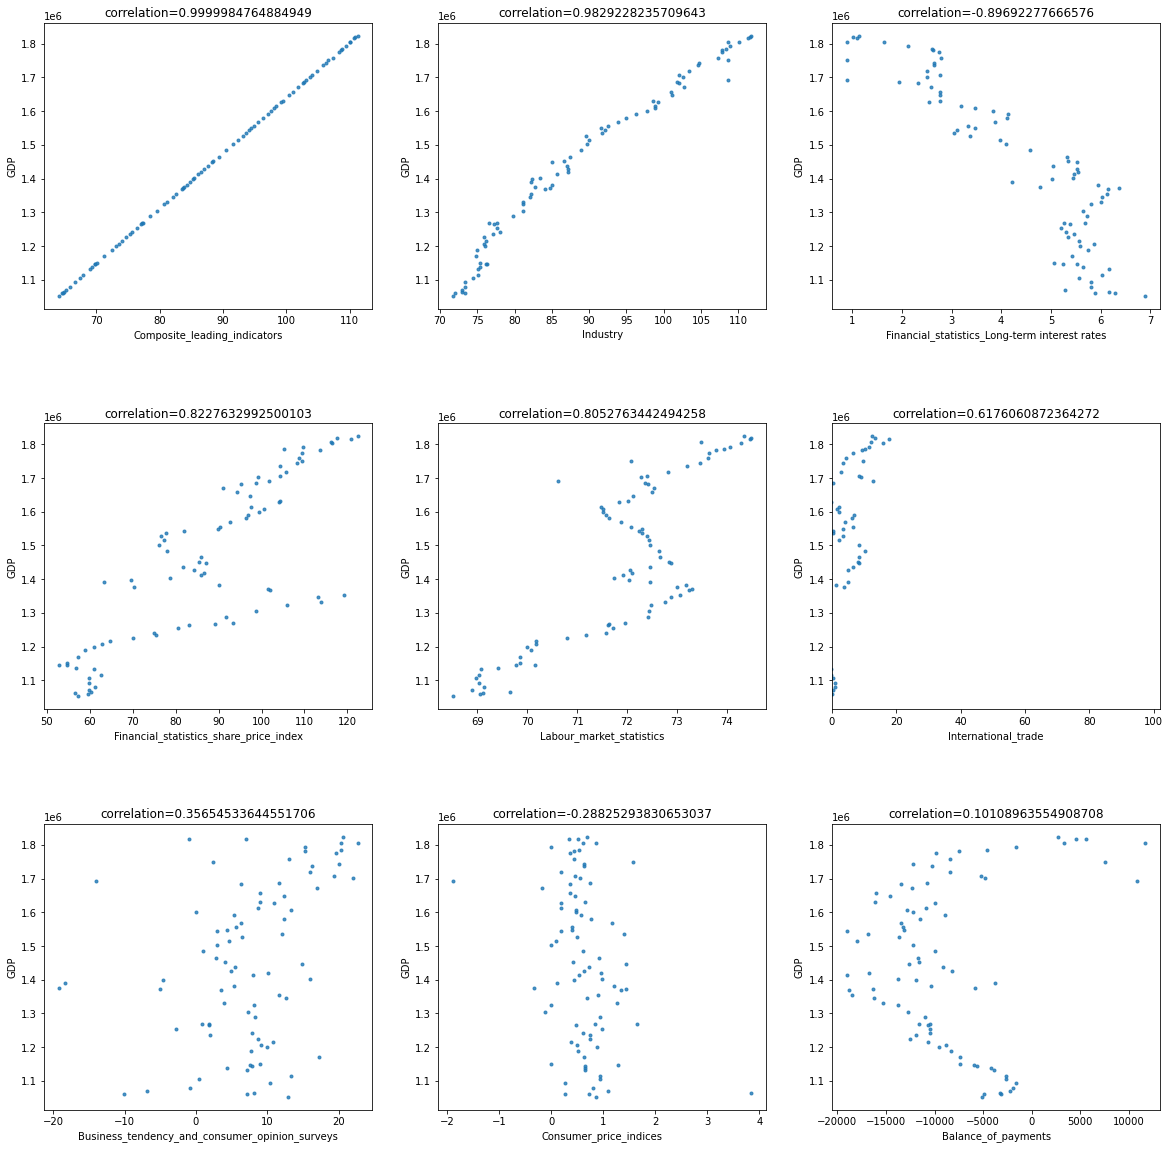

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
plt.subplots_adjust(hspace=0.4)

corr_to_gdp = pd.Series( dtype="float64")
for col in oecd_df.columns.values:
    if col!='GDP':
        corr_to_gdp[col] = oecd_df['GDP'].corr(oecd_df[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(3):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='GDP', data=oecd_df,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

In [10]:
outlier = remove_outliers(oecd_df)
outlier.isna().sum()

Balance_of_payments                               0
Business_tendency_and_consumer_opinion_surveys    0
Composite_leading_indicators                      0
Financial_statistics_share_price_index            0
Financial_statistics_Long-term interest rates     0
Industry                                          0
International_trade                               0
Labour_market_statistics                          0
Consumer_price_indices                            0
GDP                                               0
dtype: int64

In [66]:
# check stationary 

In [70]:
not_stat =[]
for col in oecd_df.columns:
    series= oecd_df[col]
    print(series.name)
    result = adfuller(series, autolag='AIC')
    #print(f'ADF Statistic: {result[0]}')
    #print(f'n_lags: {result[1]}')
    #print(f'p-value: {result[1]}')
    if  result[1] <= 0.05:
        #print( 'Not Stationary')
        not_stat.append(series.name)
   # elif result[1] > 0.05:
        #print( 'Stationary')
    for key, value in result[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')  
    #print ( "---------------------- ")

Balance_of_payments
Critial Values:
   1%, -3.5117123057187376
Critial Values:
   5%, -2.8970475206326833
Critial Values:
   10%, -2.5857126912469153
Business_tendency_and_consumer_opinion_surveys
Critial Values:
   1%, -3.5117123057187376
Critial Values:
   5%, -2.8970475206326833
Critial Values:
   10%, -2.5857126912469153
Composite_leading_indicators
Critial Values:
   1%, -3.5137900174243235
Critial Values:
   5%, -2.8979433868293945
Critial Values:
   10%, -2.5861907285474777
Financial_statistics_share_price_index
Critial Values:
   1%, -3.512738056978279
Critial Values:
   5%, -2.8974898650628984
Critial Values:
   10%, -2.585948732897085
Financial_statistics_Long-term interest rates
Critial Values:
   1%, -3.5137900174243235
Critial Values:
   5%, -2.8979433868293945
Critial Values:
   10%, -2.5861907285474777
Industry
Critial Values:
   1%, -3.5159766913976376
Critial Values:
   5%, -2.898885703483903
Critial Values:
   10%, -2.5866935058484217
International_trade
Critial Value

In [71]:
not_stat

['Business_tendency_and_consumer_opinion_surveys', 'Consumer_price_indices']

In [ ]:
# as part of the Dynamic Factor mq, this will be resolved in the model prepare data

In [11]:
# specify factors for the model
#  to understand model building look at VAR(4) of DynamicFactorMQ
factors = {col: ['Global', col]
           for col in oecd_df.columns}
factor_multiplicities = {'Global': 2}
factor_orders = {'Global': 4}

In [12]:
oecd_df.eq(0).any()

Balance_of_payments                               False
Business_tendency_and_consumer_opinion_surveys     True
Composite_leading_indicators                      False
Financial_statistics_share_price_index            False
Financial_statistics_Long-term interest rates     False
Industry                                          False
International_trade                               False
Labour_market_statistics                          False
Consumer_price_indices                             True
GDP                                               False
dtype: bool

In [13]:
start = '2000'
end = '2020-03'
endog = oecd_df.loc[start:end, :]

In [14]:
# build the model
model = sm.tsa.DynamicFactorMQ(
    endog,factor_orders=4)

In [15]:
#prepare the data for the model
model.prepare_data();

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Model Specification: Dynamic Factor Model                         
===========================================================================================
Model:                Dynamic Factor Model   # of observed variables:                    10
                   + 1 factors in 1 blocks   # of factors:                                1
                     + AR(1) idiosyncratic   Idiosyncratic disturbances:              AR(1)
Sample:                2000-03-31 00:00:00   Standardize variables:                    True
                     - 2020-03-31 00:00:00                                                 
 Observed variables / factor loadings 
======================================
              Dep. variable          0
--------------------------------------
        Balance_of_payments          X
Business_tendency_and_co...          X
Composite_leading_indica...          X
Financial_statistics_sha...          X
Financial_statistics_Lon...          X
                   Industry          X
        International_trade          X
   Labour_market_statistics          X
     Consumer_price_indices          X
                        GDP          X
    Factor blocks:   
=====================
     block      order
---------------------
         0          4
=====================
"""

In [17]:
#  iterations provide optimal fit (trial and error)
results =  model.fit(disp=10,maxiter=4000)

 criterion=9.5383e-05
EM iteration 210, llf=406.09, convergence criterion=7.9108e-05
EM iteration 220, llf=406.38, convergence criterion=6.7588e-05
EM iteration 230, llf=406.64, convergence criterion=5.9023e-05
EM iteration 240, llf=406.86, convergence criterion=5.2405e-05
EM iteration 250, llf=407.06, convergence criterion=4.7133e-05
EM iteration 260, llf=407.25, convergence criterion=4.2827e-05
EM iteration 270, llf=407.41, convergence criterion=3.9237e-05
EM iteration 280, llf=407.57, convergence criterion=3.6194e-05
EM iteration 290, llf=407.71, convergence criterion=3.3577e-05
EM iteration 300, llf=407.84, convergence criterion=3.1301e-05
EM iteration 310, llf=407.96, convergence criterion=2.93e-05
EM iteration 320, llf=408.08, convergence criterion=2.7527e-05
EM iteration 330, llf=408.19, convergence criterion=2.5943e-05
EM iteration 340, llf=408.29, convergence criterion=2.4519e-05
EM iteration 350, llf=408.39, convergence criterion=2.3232e-05
EM iteration 360, llf=408.48, conve

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Model Specification: Dynamic Factor Model                         
===========================================================================================
Model:                Dynamic Factor Model   # of observed variables:                    10
                   + 1 factors in 1 blocks   # of factors:                                1
                     + AR(1) idiosyncratic   Idiosyncratic disturbances:              AR(1)
Sample:                2000-03-31 00:00:00   Standardize variables:                    True
                     - 2020-03-31 00:00:00                                                 
 Observed variables / factor loadings 
======================================
              Dep. variable          0
--------------------------------------
        Balance_of_payments          X
Business_tendency_and_co...          X
Composite_leading_indica...          X
Financial_statistics_sha...          X
Financial_statistics_Lon...          X
                   Industry          X
        International_trade          X
   Labour_market_statistics          X
     Consumer_price_indices          X
                        GDP          X
    Factor blocks:   
=====================
     block      order
---------------------
         0          4
=====================
"""

In [19]:
rsquared = results.get_coefficients_of_determination(method='individual')

In [20]:
top_ten = []
for factor_name in rsquared.columns:
    top_factor = (rsquared[factor_name].sort_values(ascending=False)
                                       .iloc[:10].round(2).reset_index())
    top_factor.columns = pd.MultiIndex.from_product([
        [f'Top ten variables '],
        [' Variable', r'$R^2$']])
    top_ten.append(top_factor)
pd_top_ten =pd.concat(top_ten, axis=1)

In [21]:
pd_top_ten

Top ten variables       
                                         Variable $R^2$
0                    Composite_leading_indicators  1.00
1                                             GDP  1.00
2                                        Industry  0.96
3   Financial_statistics_Long-term interest rates  0.80
4                        Labour_market_statistics  0.70
5          Financial_statistics_share_price_index  0.66
6                             International_trade  0.34
7  Business_tendency_and_consumer_opinion_surveys  0.16
8                          Consumer_price_indices  0.10
9                             Balance_of_payments  0.00

In [22]:
rjoint = results.get_coefficients_of_determination(method='joint')

In [23]:
rjoint.sort_values(ascending=False)

Composite_leading_indicators                      0.998374
GDP                                               0.998373
Industry                                          0.961275
Financial_statistics_Long-term interest rates     0.804354
Labour_market_statistics                          0.695044
Financial_statistics_share_price_index            0.661647
International_trade                               0.338143
Business_tendency_and_consumer_opinion_surveys    0.161211
Consumer_price_indices                            0.103019
Balance_of_payments                               0.003416
dtype: float64

In [24]:
rcumm = results.get_coefficients_of_determination(method='cumulative')

In [25]:
rcumm.sort_values(by="0",ascending=False)

,0
Composite_leading_indicators,0.998374
GDP,0.998373
Industry,0.961275
Financial_statistics_Long-term interest rates,0.804354
Labour_market_statistics,0.695044
Financial_statistics_share_price_index,0.661647
International_trade,0.338143
Business_tendency_and_consumer_opinion_surveys,0.161211
Consumer_price_indices,0.103019
Balance_of_payments,0.003416


In [26]:
#visualise the impact of indicators on the model 

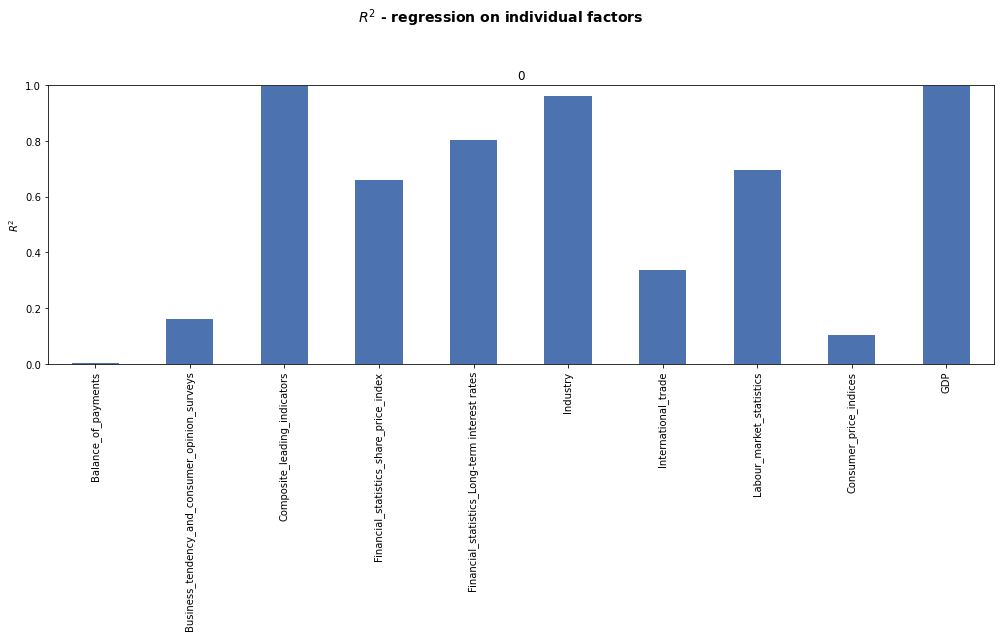

In [84]:
with sns.color_palette('deep'):
    fig = results.plot_coefficients_of_determination(method='individual', endog_labels=True ,figsize=(14, 9))
    fig.suptitle(r'$R^2$ - regression on individual factors', fontsize=14, fontweight=600)
    fig.tight_layout(rect=[0, 0, 1, 0.95]);

In [27]:
variables=["GDP","Financial_statistics_share_price_index"]

In [28]:
 start_point = '2010'
 end_point= '2021-09'
 prediction_results= results.get_prediction(start=start_point, end= end_point)
 point_predictions = prediction_results.predicted_mean[variables]

In [29]:
# results with 95% confidence
ci = prediction_results.conf_int(alpha=0.05)
lower = ci[[f'lower {name}' for name in variables]]
upper = ci[[f'upper {name}' for name in variables]]

In [75]:
lower.head()

,lower GDP,lower Financial_statistics_share_price_index
2010-03-31,1.406291e+06,76.400482
2010-06-30,1.414371e+06,77.183063
2010-09-30,1.422013e+06,75.136565
2010-12-31,1.431575e+06,72.955687
2011-03-31,1.448482e+06,76.578645


In [76]:
upper.head()

,upper GDP,upper Financial_statistics_share_price_index
2010-03-31,1.431243e+06,95.770708
2010-06-30,1.439323e+06,96.553288
2010-09-30,1.446965e+06,94.506790
2010-12-31,1.456528e+06,92.325912
2011-03-31,1.473435e+06,95.948871


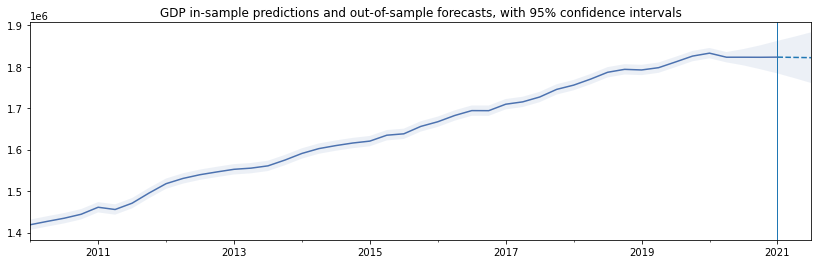

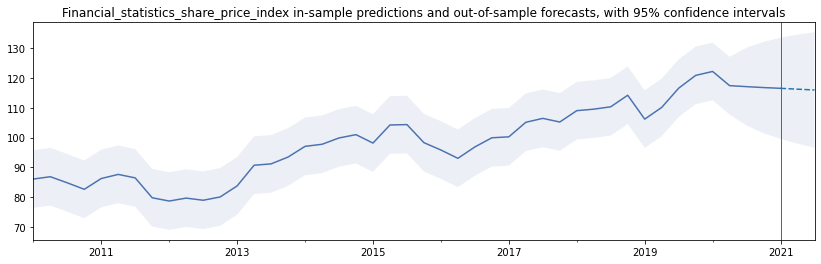

In [30]:
with sns.color_palette('deep'):
    for name in variables:
        
        fig, ax = plt.subplots(figsize=(14, 4))

        # Plot the in-sample predictions
        point_predictions.loc[:'2021-03',name].plot(ax=ax)

        # Plot the out-of-sample forecasts
        point_predictions.loc['2021-03':,name].plot(ax=ax, linestyle='--',
                                            color=['C0', 'C1', 'C2'],
                                            legend=False)

        # Confidence intervals
        
        ax.fill_between(ci.index,
                            lower[f'lower {name}'],
                            upper[f'upper {name}'], alpha=0.1)
            
        # Forecast period, set title
        ylim = ax.get_ylim()
        ax.vlines('2021-1', ylim[0], ylim[1], linewidth=1)
        ax.annotate(r' Forecast $\rightarrow$', ('2021-01', -1.7))
        ax.set(title=(f'{name}'
                    ' in-sample predictions and out-of-sample forecasts, with 95% confidence intervals'), ylim=ylim)

In [31]:
start = "2000"
end= '2021'
endog_recent = oecd_df.loc[start:end, :]

In [32]:
r2021 = results.apply(endog_recent)

In [33]:
news = r2021.news(results,impact_date="2021",impact_variable="GDP",comparison_type="previous")

In [34]:
news.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       News                                      
=================================================================================
Model:                DynamicFactorMQ   Original sample:      2000-03-31 00:00:00
Date:                Thu, 10 Jun 2021                       - 2020-03-31 00:00:00
Time:                        15:02:25   Update through:       2020-12-31 00:00:00
                                        No. Revisions:                          0
                                        No. New datapoints:                    30
                                                    Impacts                                                     
================================================================================================================
        impact date                              impacted variable estimate (prev) impact of news estimate (new)
----------------------------------------------------------------------------------------------------------------
2021-03-31 00:00:00                            Balance_of_payments         -275.66        6101.39        9545.69
                    Business_tendency_and_consumer_opinion_surveys           13.23          -2.72          15.88
                                      Composite_leading_indicators          111.13         -22.23         110.32
                                            Consumer_price_indices            0.35           0.25           0.33
                     Financial_statistics_Long-term interest rates            1.42           1.61           1.01
                            Financial_statistics_share_price_index          116.52         -27.22         116.29
                                                               GDP      1822997.60     -363103.38     1811458.32
                                                          Industry          110.66         -18.65         108.78
                                               International_trade            9.95          -4.92          11.21
                                          Labour_market_statistics           74.43          -3.67          73.53
                                     News from updated observations:                                     
=========================================================================================================
        update date                               updated variable   observed forecast (prev)        news
---------------------------------------------------------------------------------------------------------
2020-06-30 00:00:00                            Balance_of_payments   10804.13         3142.81     7661.32
                    Business_tendency_and_consumer_opinion_surveys     -14.00            8.23      -22.23
                                      Composite_leading_indicators     103.11          111.12       -8.01
                                            Consumer_price_indices      -1.89            0.35       -2.24
                     Financial_statistics_Long-term interest rates       0.90            1.11       -0.22
                            Financial_statistics_share_price_index     101.69          117.42      -15.73
                                                               GDP 1691897.70      1822817.44  -130919.74
                                                          Industry     108.58          111.49       -2.91
                                               International_trade      12.81           12.17        0.63
                                          Labour_market_statistics      70.61           74.49       -3.88
2020-09-30 00:00:00                            Balance_of_payments    7560.20         1877.06     5683.13
                    Business_tendency_and_consumer_opinion_surveys       2.33           11.57       -9.24
                                      Composite_leading_indicators     106.62          111.12       

In [35]:
news_details=news.details_by_impact

In [36]:
news_details.index = news_details.index.droplevel(['impact date', 'impacted variable'])

In [37]:
news_details["absolute impact"] = np.abs(news_details['impact'])

In [38]:
details = (news_details.sort_values('absolute impact', ascending=False)
                  .drop('absolute impact', axis=1))
news_details.iloc[:].round(2)

observed  \
update date updated variable                                             
2020-06-30  Balance_of_payments                               10804.13   
            Business_tendency_and_consumer_opinion_surveys      -14.00   
            Composite_leading_indicators                        103.11   
            Consumer_price_indices                               -1.89   
            Financial_statistics_Long-term interest rates         0.90   
...                                                                ...   
2020-12-31  Financial_statistics_share_price_index              116.21   
            GDP                                             1806519.70   
            Industry                                            108.58   
            International_trade                                  12.05   
            Labour_market_statistics                             73.48   

                                                            forecast (prev)  \
update date updated variable                                                  
2020-06-30  Balance_of_payments                                     3142.81   
            Business_tendency_and_consumer_opinion_surveys             8.23   
            Composite_leading_indicators                             111.12   
            Consumer_price_indices                                     0.35   
            Financial_statistics_Long-term interest rates              1.11   
...                                                                     ...   
2020-12-31  Financial_statistics_share_price_index                   116.77   
            GDP                                                  1822679.85   
            Industry                                                 110.89   
            International_trade                                       10.54   
            Labour_market_statistics                                  74.45   

                                                                news  weight  \
update date updated variable                                                   
2020-06-30  Balance_of_payments                              7661.32    0.00   
            Business_tendency_and_consumer_opinion_surveys    -22.23    0.00   
            Composite_leading_indicators                       -8.01    8.26   
            Consumer_price_indices                             -2.24   -0.00   
            Financial_statistics_Long-term interest rates      -0.22   -0.00   
...                                                              ...     ...   
2020-12-31  Financial_statistics_share_price_index             -0.56   -0.00   
            GDP                                            -16160.15   -0.00   
            Industry                                           -2.31   -0.00   
            International_trade                                 1.51   -0.00   
            Labour_market_statistics                           -0.97    0.16   

                                                            impact  \
update date updated variable                                         
2020-06-30  Balance_of_payments                               0.00   
            Business_tendency_and_consumer_opinion_surveys   -0.00   
            Composite_leading_indicators                    -66.19   
            Consumer_price_indices                            0.00   
            Financial_statistics_Long-term interest rates     0.00   
...                                                            ...   
2020-12-31  Financial_statistics_share_price_index            0.00   
            GDP                                               0.01   
            Industry                                          0.00   
            International_trade                              -0.00   
            Labour_market_statistics                         -0.15   

                                                            absolute impact  
update date updated variable             

update model to understand quarterly impact of changes in economic data

In [39]:
quarter_results={}
quarters = ['2020-06', '2020-09', '2020-12', '2021-03', '2021-06']
quarters_prev = ['2019-12','2020-03','2020-06' ,'2020-09', '2020-12']
quarters_prev_back = ['2019-03','2019-06' ,'2019-09', '2019-12', '2020-03']
start = "2000"
end= '2021'

In [40]:
# Apply our results to the remaining vintages
for quarter in quarters_prev:
    # Get updated data for the vintage
    updated_endog = oecd_df.loc[start:quarter, :]
   

    # Get updated results for for the vintage
    quarter_results[quarter] = results.apply(
        updated_endog)

In [41]:
forecasts={}
for quarter, qresult in quarter_results.items():
    forecasts[quarter] = qresult.forecast('2021-06')["GDP"].last('Q')

In [42]:
#forecasts

In [43]:
# Compute forecasts for each vintage
forecasts = {quarter: res.forecast('Jun 2021')["GDP"].resample('Q').last()
             for quarter, res in quarter_results.items()}
# Convert to a Pandas series with a date index
print (list(forecasts.keys()))

['2019-12', '2020-03', '2020-06', '2020-09', '2020-12']


In [44]:
fcasts=[]
for quarter, value in forecasts.items():
    fcasts.append (value.loc["2021Q2"][0])

forecasts_series = pd.Series(fcasts,
                      index=pd.PeriodIndex(forecasts.keys(), freq='Q'))

In [45]:
for quarter, value in forecasts_series.items():
    print(f'{quarter} forecast for real GDP  in 2021Q3:'
          f' {value:.2f}')

2019Q4 forecast for real GDP  in 2021Q3: 1862148.25
2020Q1 forecast for real GDP  in 2021Q3: 1822377.92
2020Q2 forecast for real GDP  in 2021Q3: 1496285.85
2020Q3 forecast for real GDP  in 2021Q3: 1682880.23
2020Q4 forecast for real GDP  in 2021Q3: 1848311.23


In [46]:
news_results = {}
#quarters
#vintages = ['2020-02', '2020-03', '2020-04', '2020-05', '2020-06']
impact_date = '2021-Q2'

for i in range(1, len(quarters_prev)):
    quarter = quarters_prev[i]
    prev_quarter= quarters_prev[i - 1]

    # Get the "incremental" news, we are computing
    # the news relative to the previous vintage and not to the baseline
    # (February 2020) vintage
    news_results[quarter] = quarter_results[quarter].news(
        quarter_results[prev_quarter],
        impact_date=impact_date,
        impacted_variable= "GDP",
        comparison_type='previous')

In [47]:
oecd_df.columns

Index(['Balance_of_payments', 'Business_tendency_and_consumer_opinion_surveys',
       'Composite_leading_indicators',
       'Financial_statistics_share_price_index',
       'Financial_statistics_Long-term interest rates', 'Industry',
       'International_trade', 'Labour_market_statistics',
       'Consumer_price_indices', 'GDP'],
      dtype='object')

In [48]:
news_results.keys()

dict_keys(['2020-03', '2020-06', '2020-09', '2020-12'])

In [49]:
news_results["2020-03"].details_by_impact

observed  \
impact date impacted variable update date updated variable                                               
2021-06-30  GDP               2020-03-31  Balance_of_payments                             4.550063e+03   
                                          Business_tendency_and_consumer_opinion_surveys -1.000000e+00   
                                          Composite_leading_indicators                    1.108739e+02   
                                          Consumer_price_indices                          3.442341e-01   
                                          Financial_statistics_Long-term interest rates   1.006667e+00   
                                          Financial_statistics_share_price_index          1.174883e+02   
                                          GDP                                             1.818612e+06   
                                          Industry                                        1.116242e+02   
                                          International_trade                             1.321924e+01   
                                          Labour_market_statistics                        7.448933e+01   

                                                                                          forecast (prev)  \
impact date impacted variable update date updated variable                                                  
2021-06-30  GDP               2020-03-31  Balance_of_payments                                1.526878e+03   
                                          Business_tendency_and_consumer_opinion_surveys     1.624043e+01   
                                          Composite_leading_indicators                       1.117238e+02   
                                          Consumer_price_indices                             3.237951e-01   
                                          Financial_statistics_Long-term interest rates      1.189569e+00   
                                          Financial_statistics_share_price_index             1.221705e+02   
                                          GDP                                                1.832612e+06   
                                          Industry                                           1.118623e+02   
                                          International_trade                                1.172693e+01   
                                          Labour_market_statistics                           7.436594e+01   

                                                                                                  news  \
impact date impacted variable update date updated variable                                               
2021-06-30  GDP               2020-03-31  Balance_of_payments                              3023.185171   
                                          Business_tendency_and_consumer_opinion_surveys    -17.240429   
                                          Composite_leading_indicators                       -0.849867   
                                          Consumer_price_indices                              0.020439   
                                          Financial_statistics_Long-term interest rates      -0.182902   
                                          Financial_statistics_share_price_index             -4.682241   
                                          GDP                                            -14000.555049   
                                          Industry                                           -0.238055   
                                          International_trade                                 1.492307   
                                          Labour_market_statistics                            0.123393   

                                                                                                weight  \
impact date impacted variable update date updated variable                                               
2021-06-30  GDP            

In [50]:
group_impacts = {'2019-12': None}

for quarter, news in news_results.items():
    # Start from the details by impact table
    details_by_impact = (
        news.details_by_impact.reset_index()
            .drop(['impact date', 'impacted variable'], axis=1))
    
    # Merge with the groups dataset, so that we can identify
    # which group each individual impact belongs to
    impacts =  details_by_impact.set_index(['update date', 'updated variable'],drop=True)
                

    # Compute impacts by group, summing across the individual impacts
    group_impacts[quarter] = impacts.groupby('updated variable').sum()['impact']

# Add in a row of zeros for the baseline forecast
group_impacts['2019-12'] = group_impacts['2020-03'] * np.nan




In [51]:
# Convert into a Pandas DataFrame, and fill in missing entries
# with zeros (missing entries happen when there were no updates
# for a given group in a given vintage)
df_group_impacts = pd.DataFrame(group_impacts).fillna(0)
df_group_impacts.drop(["GDP"],inplace=True)

In [52]:
df_group_impacts= df_group_impacts.append(df_group_impacts.sum(axis=0).rename('Total impact on 2021Q2 forecast')).round(2)

In [53]:
df_group_impacts.index.name = "group"

In [54]:
df_group_impacts

,2019-12,2020-03,2020-06,2020-09,2020-12
group,,,,,
Balance_of_payments,0.0,0.00,0.01,-0.00,0.00
Business_tendency_and_consumer_opinion_surveys,0.0,-0.06,-0.06,0.00,0.02
Composite_leading_indicators,0.0,-37186.88,-296661.03,160151.96,123433.49
Consumer_price_indices,0.0,-0.00,0.07,-0.02,-0.01
Financial_statistics_Long-term interest rates,0.0,0.08,0.08,0.12,0.09
Financial_statistics_share_price_index,0.0,-0.11,-0.32,0.15,0.11
Industry,0.0,-0.16,-1.59,1.02,0.73
International_trade,0.0,0.03,0.01,-0.01,0.03
Labour_market_statistics,0.0,0.10,-2.58,0.81,0.54


In [55]:
group_impacts= df_group_impacts.T

In [56]:
group_impacts.index = pd.DatetimeIndex(group_impacts.index)

In [57]:
forecasts_series

2019Q4    1.862148e+06
2020Q1    1.822378e+06
2020Q2    1.496286e+06
2020Q3    1.682880e+06
2020Q4    1.848311e+06
Freq: Q-DEC, dtype: float64

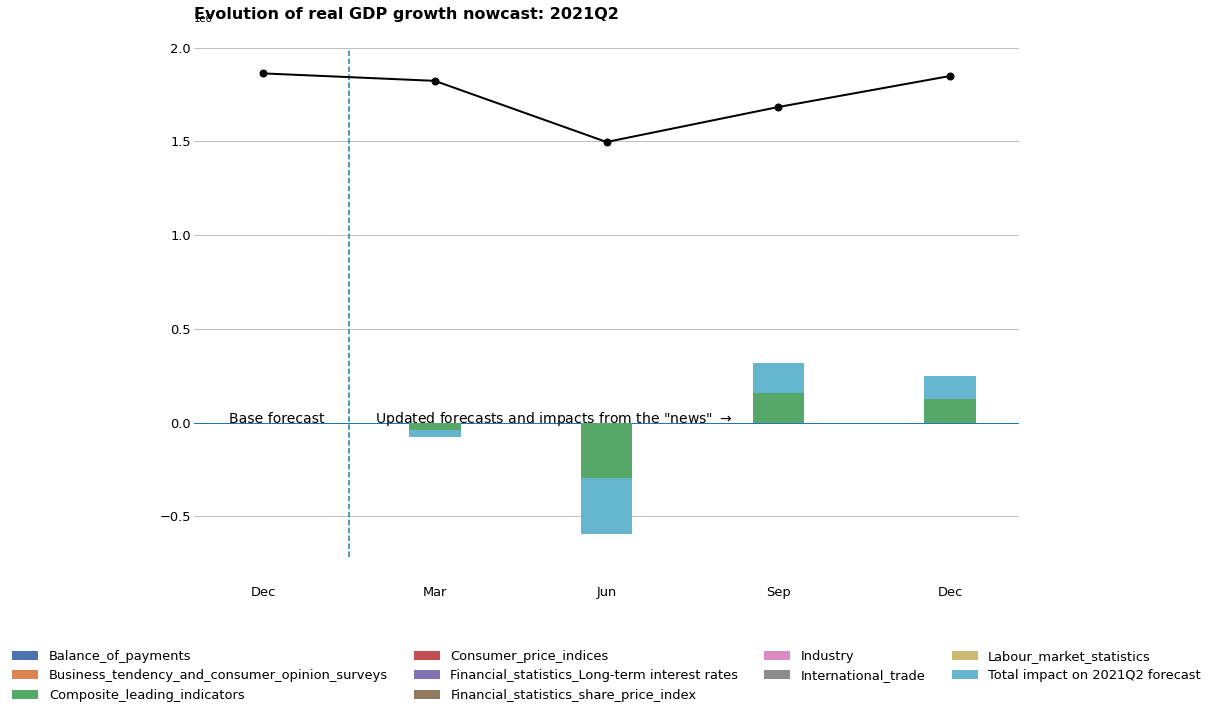

In [64]:
with sns.color_palette('deep'):
    fig, ax = plt.subplots(figsize=(16, 10))

    # Stacked bar plot showing the impacts by group
    group_impacts.plot(kind='bar', stacked=True, width=0.3, zorder=2, ax=ax);

    # Line plot showing the forecast for real GDP growth in 2020Q2 for each vintage
    x = np.arange(len(forecasts_series))
    ax.plot(x, forecasts_series, marker='o', color='k', markersize=7, linewidth=2)
    ax.hlines(0, -1, len(group_impacts) + 1, linewidth=1)

    # x-ticks
    labels = group_impacts.index.strftime('%b')
    ax.xaxis.set_ticklabels(labels)
    ax.xaxis.set_tick_params(size=0)
    ax.xaxis.set_tick_params(labelrotation='auto', labelsize=13)

    # y-ticks
    ax.yaxis.set_tick_params(direction='in', size=0, labelsize=13)
    ax.yaxis.grid(zorder=0)
    
    # title, remove spines
    ax.set_title('Evolution of real GDP growth nowcast: 2021Q2', fontsize=16, fontweight=600, loc='left')
    [ax.spines[spine].set_visible(False)
     for spine in ['top', 'left', 'bottom', 'right']]
    
    # base forecast vs updates
    ylim = ax.get_ylim()
    ax.vlines(0.5, ylim[0], ylim[1] + 5, linestyles='--')
    ax.annotate('Base forecast', (-0.2, 22), fontsize=14)
    ax.annotate(r'Updated forecasts and impacts from the "news" $\rightarrow$', (0.65, 22), fontsize=14)

    # legend
    ax.legend(loc='upper center', ncol=4, fontsize=13, bbox_to_anchor=(0.5, -0.1), frameon=False)

    fig.tight_layout();